In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy
from scipy import stats

In [35]:
sales_receipts = pd.read_csv("../app/data/sales_reciepts.csv", delimiter=",")
products = pd.read_csv("../app/data/product.csv", delimiter=",")

sales_receipts_grouped = sales_receipts.groupby('product_id')['quantity'].sum().reset_index()

product_sales = pd.merge(sales_receipts_grouped, products, on='product_id', how='left')

product_sales.dropna(subset=['product_category'], inplace=True)

# sorted_product_sales = product_sales.sort_values(by="quantity", ascending=False)
# limit = 100
# merged_fork = sorted_product_sales.iloc[0: limit]

# selected_columns = merged_fork[['quantity', 'product', 'product_id', 'current_retail_price', 'current_retail_price']]

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))
plt.bar(product_sales['product_id'], product_sales['quantity'])
plt.xticks(np.arange(len(product_sales)), product_sales['product'], rotation=90)

([<matplotlib.axis.XTick at 0x7fd75c70c350>,
 [Text(0, 0, 'Coffee beans'),
  Text(1, 0, 'Coffee beans'),
  Text(2, 0, 'Coffee beans'),
  Text(3, 0, 'Coffee beans'),
  Text(4, 0, 'Coffee beans'),
  Text(5, 0, 'Coffee beans'),
  Text(6, 0, 'Coffee beans'),
  Text(7, 0, 'Coffee beans'),
  Text(8, 0, 'Coffee beans'),
  Text(9, 0, 'Coffee beans'),
  Text(10, 0, 'Loose Tea'),
  Text(11, 0, 'Loose Tea'),
  Text(12, 0, 'Loose Tea'),
  Text(13, 0, 'Loose Tea'),
  Text(14, 0, 'Loose Tea'),
  Text(15, 0, 'Loose Tea'),
  Text(16, 0, 'Loose Tea'),
  Text(17, 0, 'Loose Tea'),
  Text(18, 0, 'Packaged Chocolate'),
  Text(19, 0, 'Packaged Chocolate'),
  Text(20, 0, 'Packaged Chocolate'),
  Text(21, 0, 'Coffee'),
  Text(22, 0, 'Coffee'),
  Text(23, 0, 'Coffee'),
  Text(24, 0, 'Coffee'),
  Text(25, 0, 'Coffee'),
  Text(26, 0, 'Coffee'),
  Text(27, 0, 'Coffee'),
  Text(28, 0, 'Coffee'),
  Text(29, 0, 'Coffee'),
  Text(30, 0, 'Coffee'),
  Text(31, 0, 'Coffee'),
  Text(32, 0, 'Coffee'),
  Text(33, 0, 'Coffe

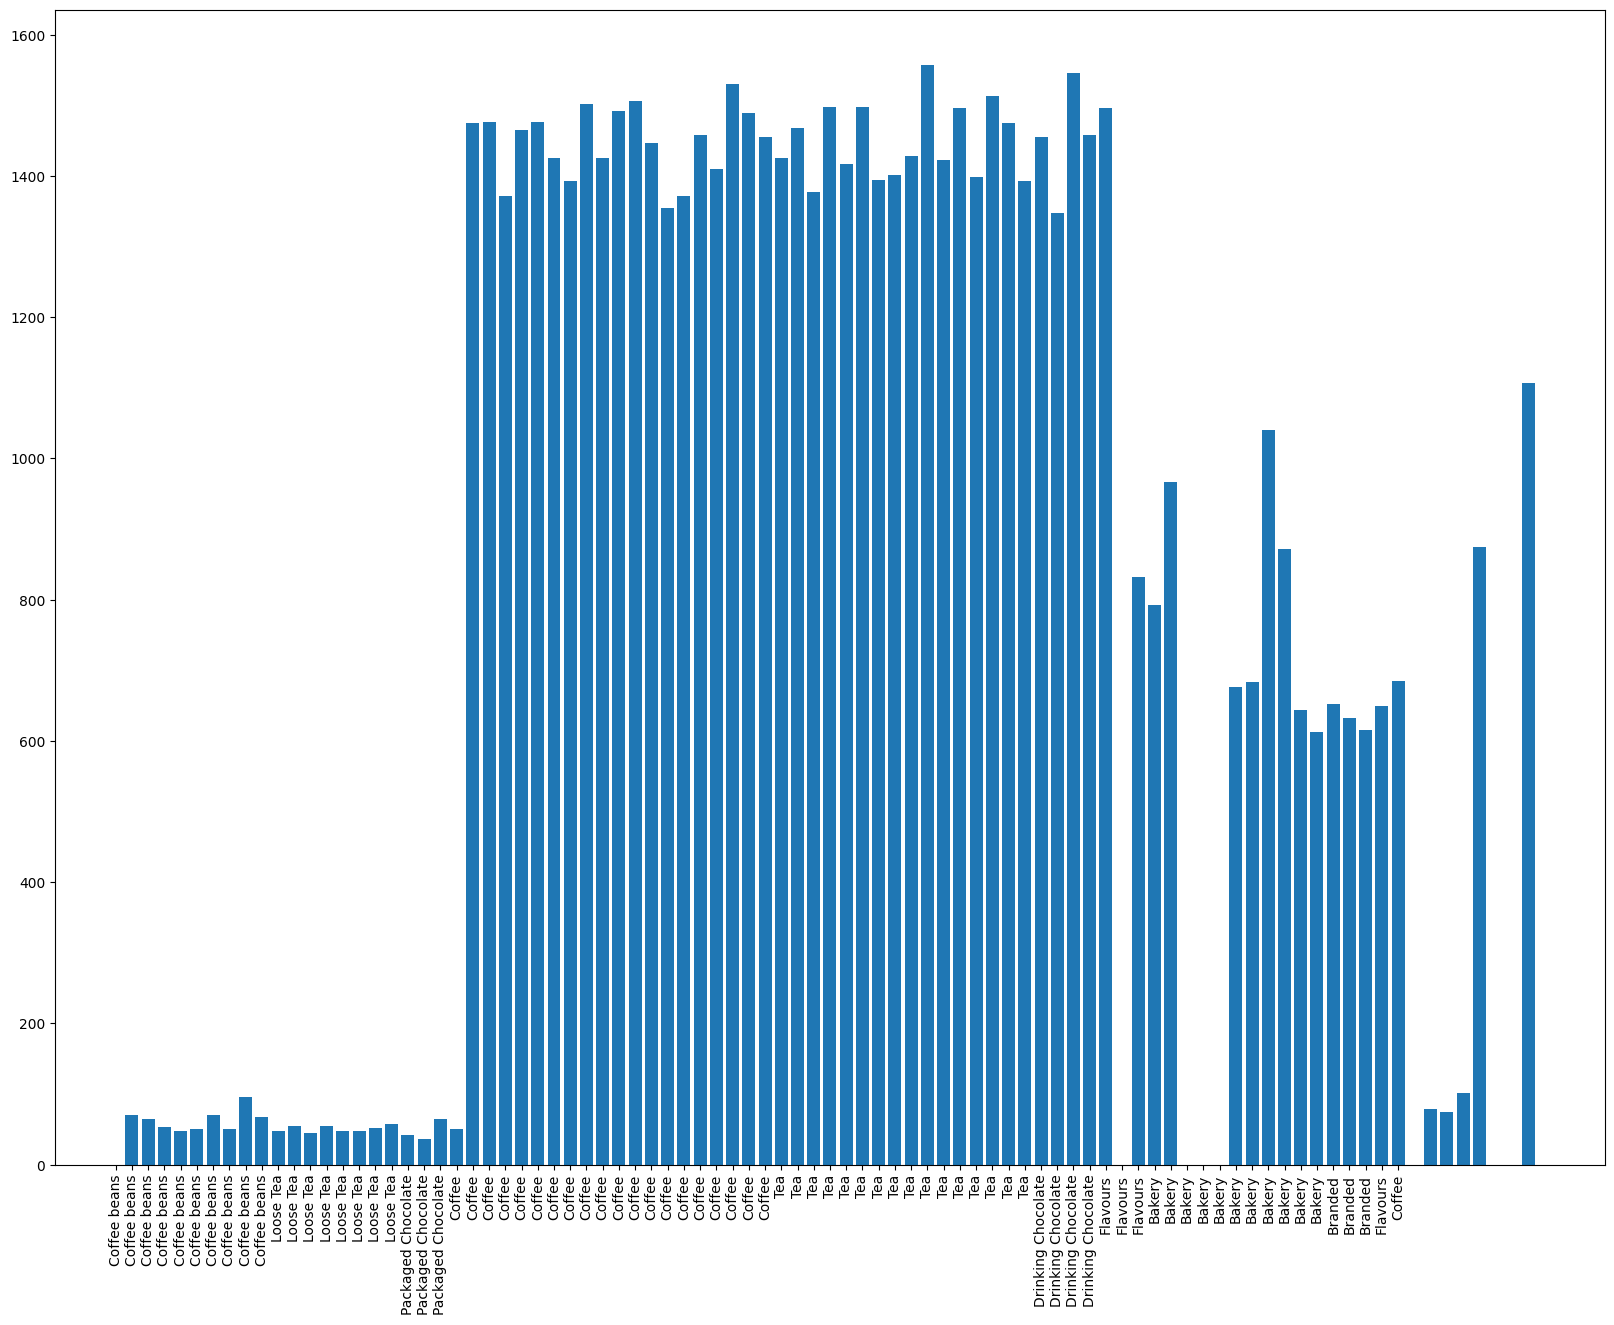

In [36]:
fig, ax = plt.subplots(figsize=(20, 15))
plt.bar(product_sales['product_id'], product_sales['quantity'])
plt.xticks(np.arange(len(product_sales)), product_sales['product_category'], rotation=90)